In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("panic_disorder_dataset.csv")

In [26]:
num_rows, num_columns = df.shape
print(f'The CSV file has {num_rows} rows and {num_columns} columns.')

The CSV file has 120000 rows and 16 columns.


In [3]:
print(df.head())

   Participant ID  Age  Gender Family History Personal History  \
0               1   38    Male             No              Yes   
1               2   51    Male             No               No   
2               3   32  Female            Yes               No   
3               4   64  Female             No               No   
4               5   31    Male            Yes               No   

  Current Stressors             Symptoms  Severity Impact on Life  \
0          Moderate  Shortness of breath      Mild           Mild   
1              High        Panic attacks      Mild           Mild   
2              High        Panic attacks      Mild    Significant   
3          Moderate           Chest pain  Moderate       Moderate   
4          Moderate        Panic attacks      Mild       Moderate   

  Demographics Medical History  Psychiatric History Substance Use  \
0        Rural        Diabetes     Bipolar disorder           NaN   
1        Urban          Asthma     Anxiety disorde

In [4]:
print("Missing values:")
print(df.isnull().sum())

print("Duplicate values:")
print(df.duplicated().sum())

Missing values:
Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             30174
Psychiatric History         29910
Substance Use               39991
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64
Duplicate values:
0


In [5]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64


In [7]:
chi2_results = {}
target_column = 'Panic Disorder Diagnosis'
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    contingency_table = pd.crosstab(df[target_column], df[col])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'P-value': p}

print("\nChi-square test results:")
for col, result in chi2_results.items():
    print(f"{col}: Chi2={result['Chi2']}, P-value={result['P-value']}")


Chi-square test results:
Gender: Chi2=0.03091419067256254, P-value=0.8604319645319395
Family History: Chi2=538.1871144627277, P-value=4.675447114221513e-119
Personal History: Chi2=666.6324743083592, P-value=5.394426172619942e-147
Current Stressors: Chi2=3665.3922026768096, P-value=0.0
Symptoms: Chi2=1674.089192637576, P-value=0.0
Severity: Chi2=1504.5021614804182, P-value=0.0
Impact on Life: Chi2=1949.637125021937, P-value=0.0
Demographics: Chi2=124.77730774434123, P-value=5.693911530525767e-29
Medical History: Chi2=96.64819643616646, P-value=1.03064903492934e-21
Psychiatric History: Chi2=58.00060442793323, P-value=2.542897032240846e-13
Substance Use: Chi2=25.86879556373825, P-value=3.654289966785257e-07
Coping Mechanisms: Chi2=629.9312695402893, P-value=3.269168250814622e-136
Social Support: Chi2=96.97707723411504, P-value=8.743699893033474e-22
Lifestyle Factors: Chi2=10773.17825103782, P-value=0.0


In [8]:
df.drop(columns=['Gender'], inplace=True)

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [10]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = label_encoder.fit_transform(df[column])

In [11]:
print(df.head())

   Participant ID  Age  Family History  Personal History  Current Stressors  \
0               1   38               0                 1                  2   
1               2   51               0                 0                  0   
2               3   32               1                 0                  0   
3               4   64               0                 0                  2   
4               5   31               1                 0                  2   

   Symptoms  Severity  Impact on Life  Demographics  Medical History  \
0         4         0               0             0                1   
1         3         0               0             1                0   
2         3         0               2             1                1   
3         0         1               1             0                1   
4         3         0               1             0                0   

   Psychiatric History  Substance Use  Coping Mechanisms  Social Support  \
0               

In [12]:
X = df.drop(columns=['Participant ID', 'Panic Disorder Diagnosis'])
y = df['Panic Disorder Diagnosis']

In [13]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X, X_encoded], axis=1)

/home/students/debpal/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


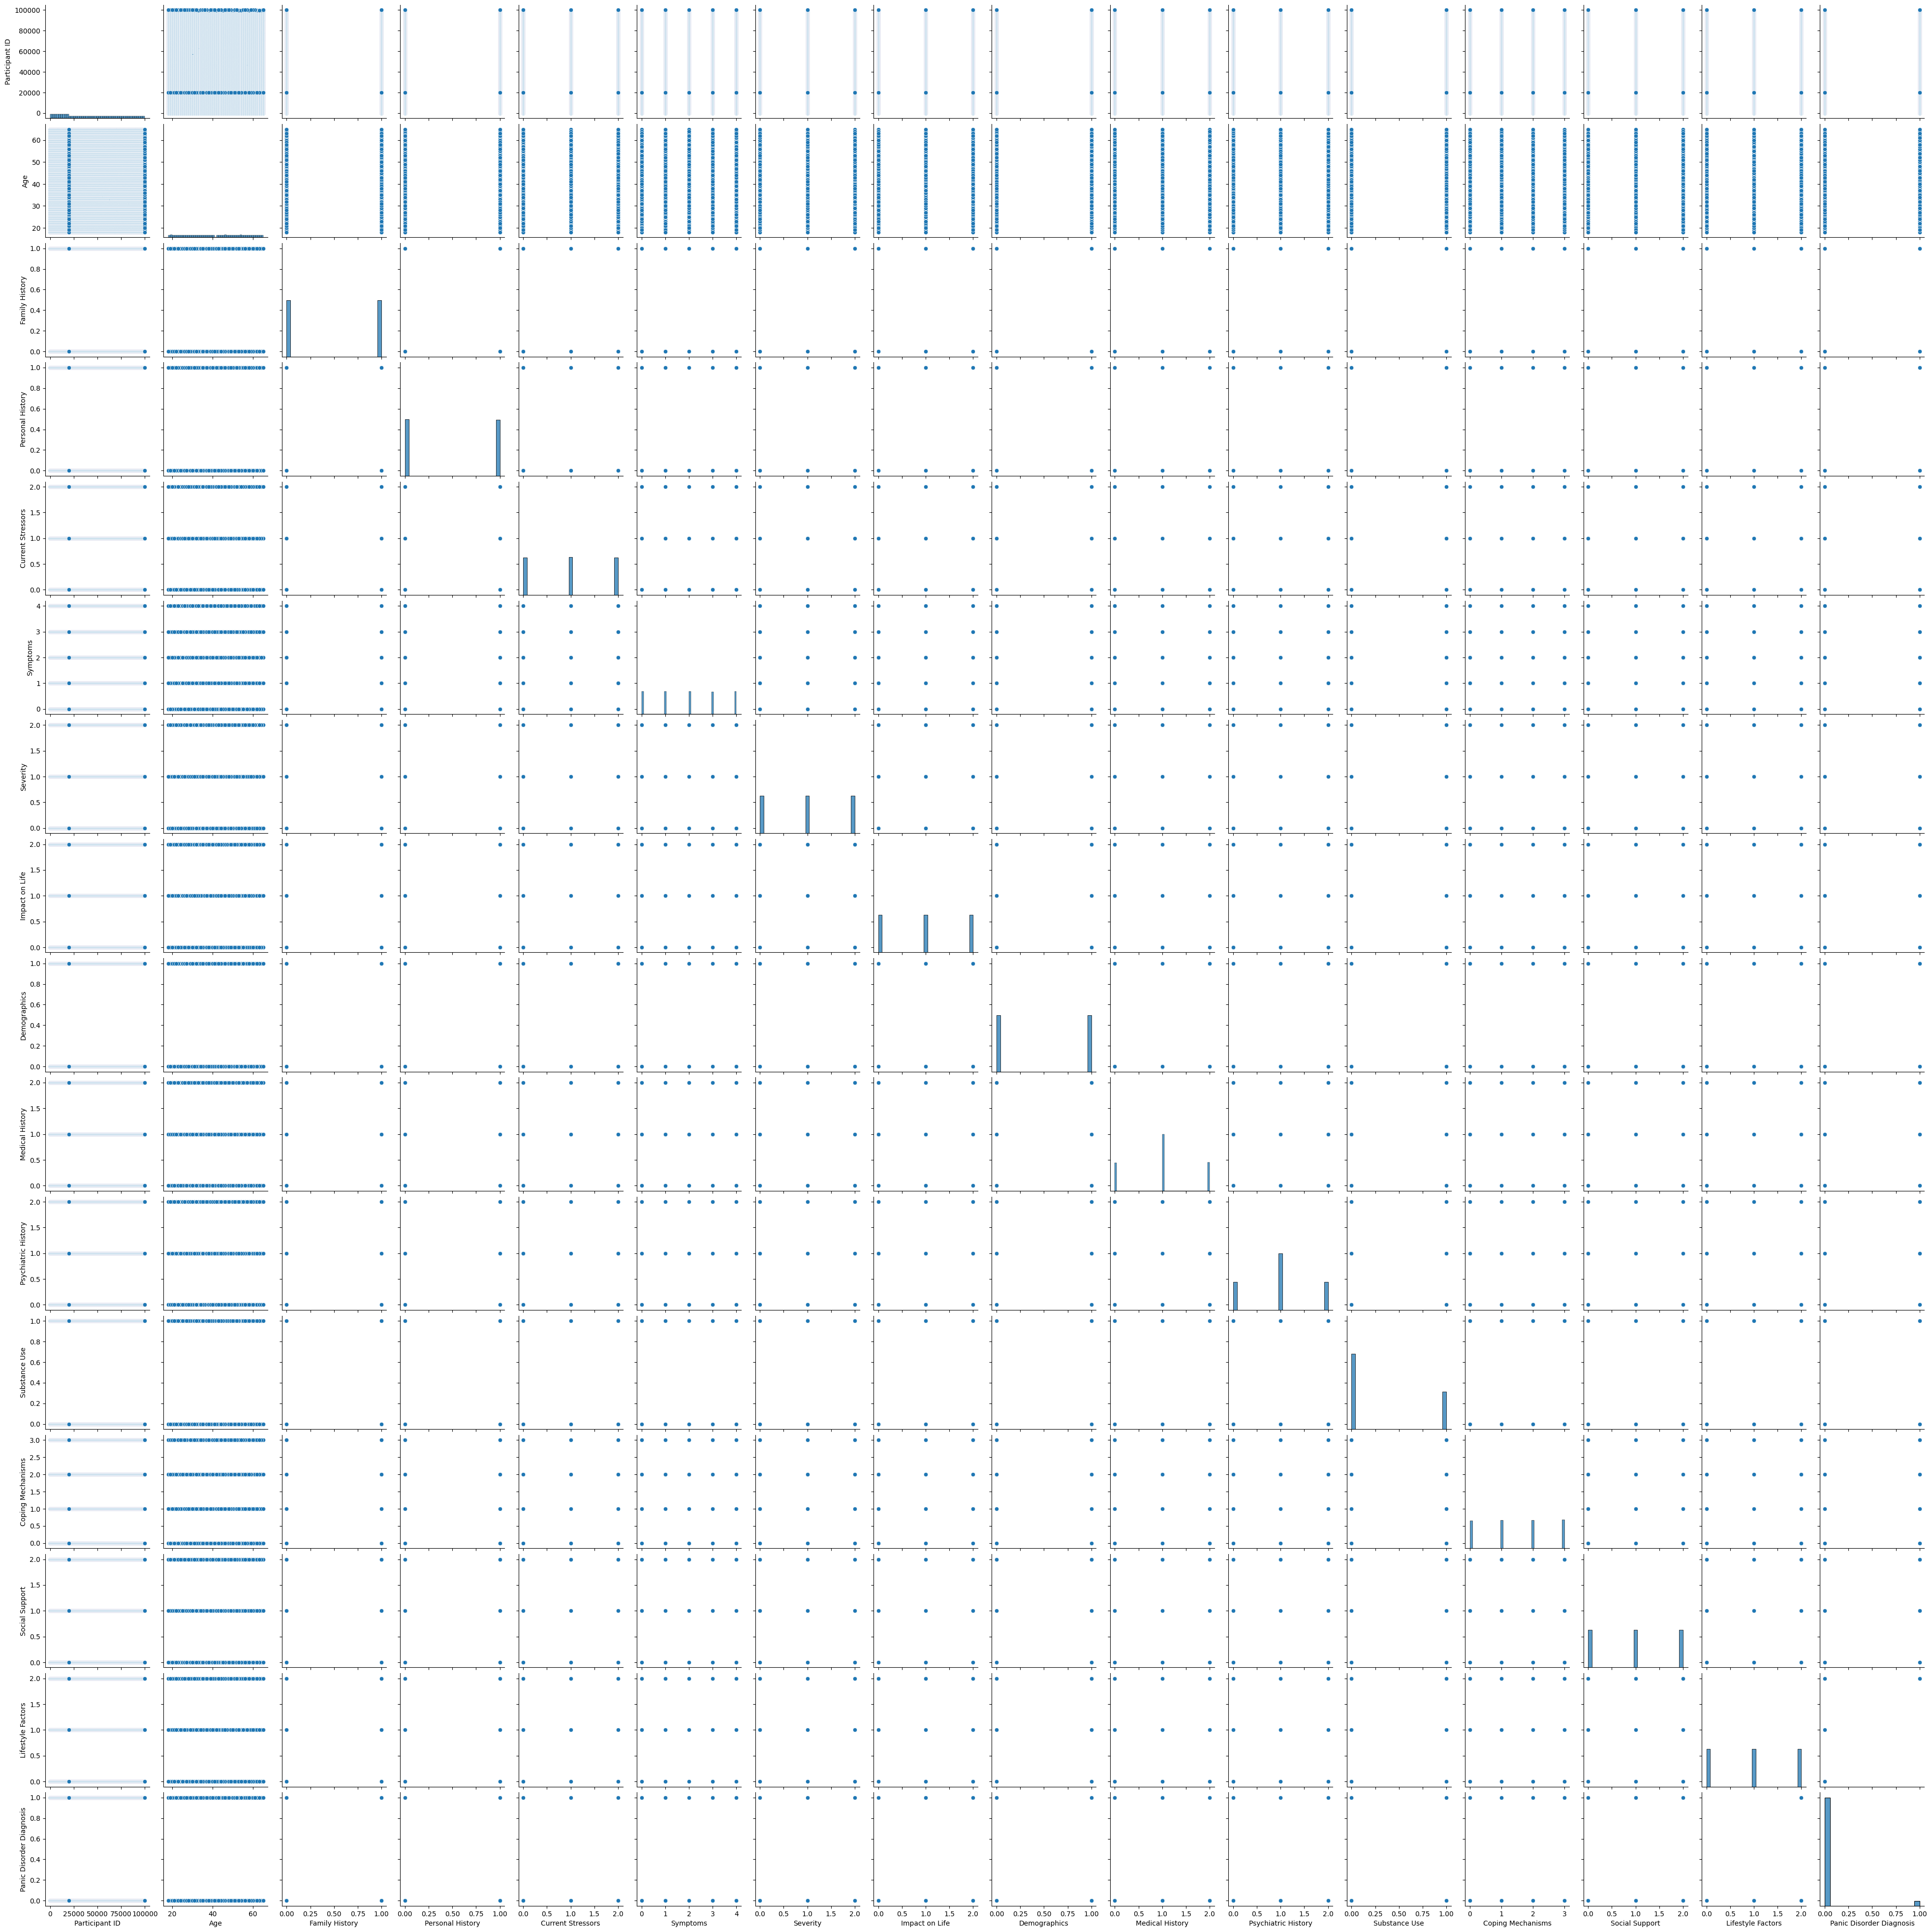

In [14]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

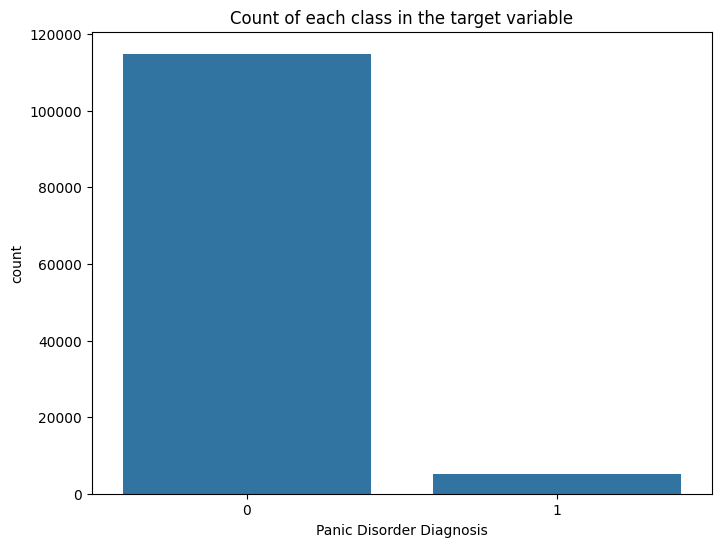

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Panic Disorder Diagnosis', data=df)
plt.title('Count of each class in the target variable')
plt.show()

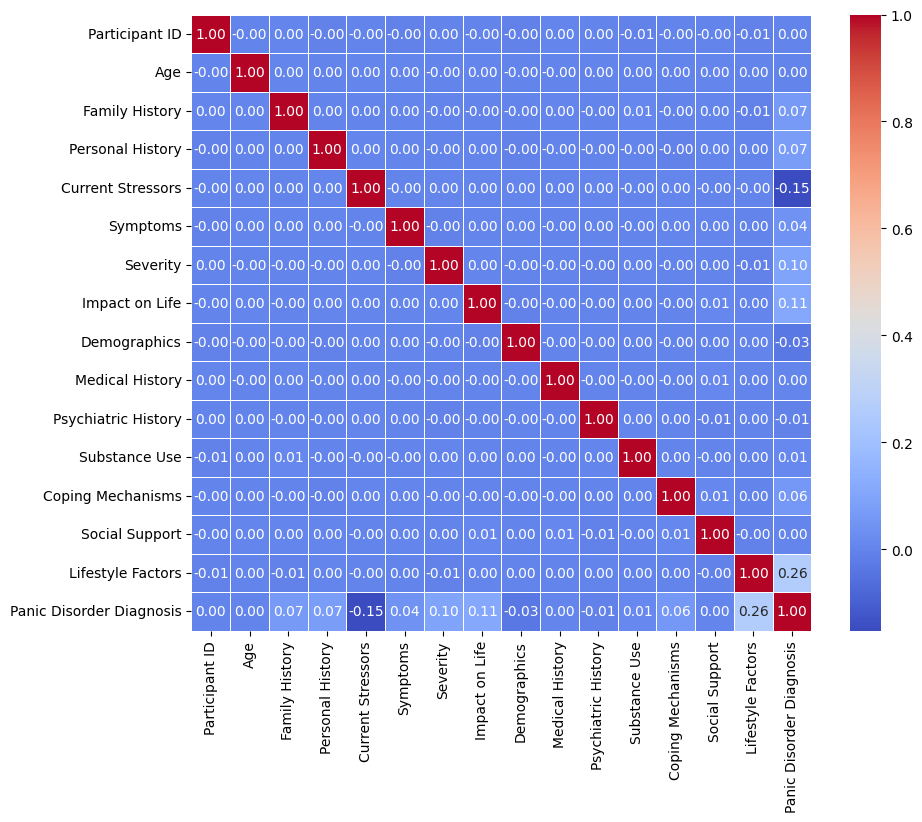

In [16]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

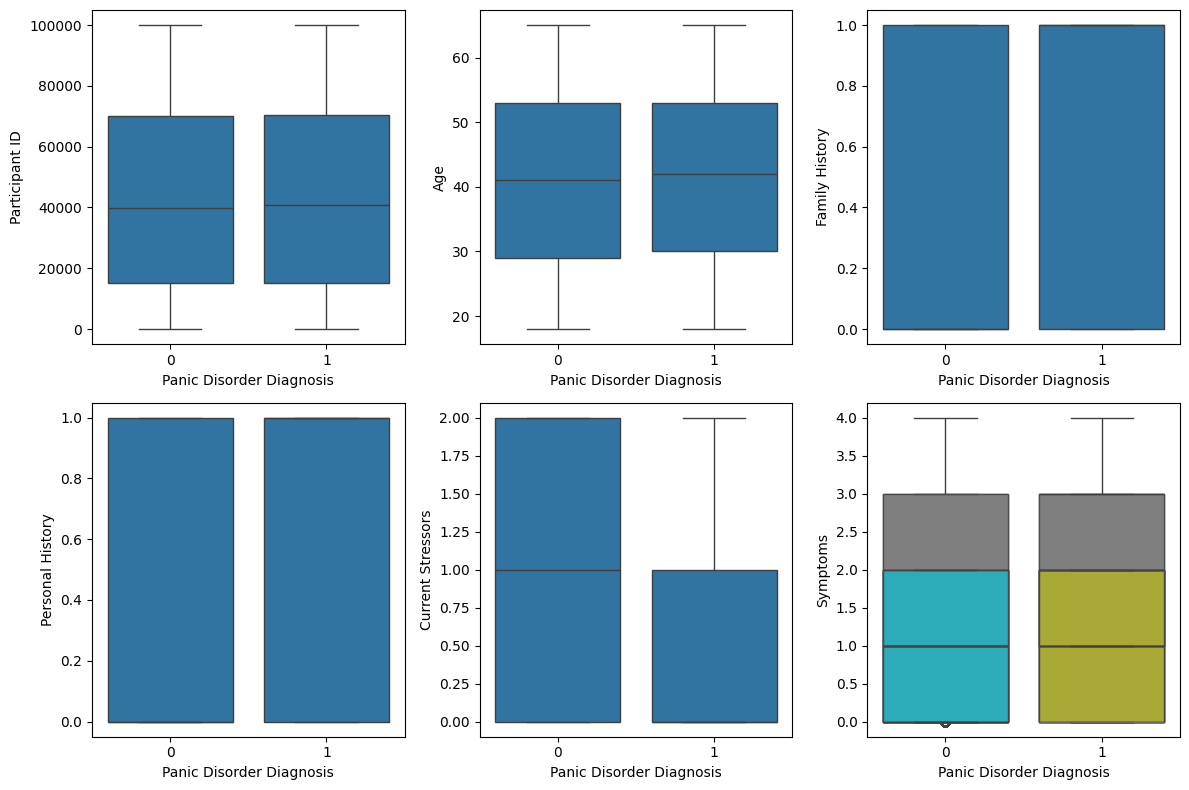

In [18]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3, min(i+1, 6)) 
    sns.boxplot(x='Panic Disorder Diagnosis', y=col, data=df)

plt.tight_layout()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [25]:
model = LogisticRegression(random_state=42, max_iter = 1000)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9662083333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22992
           1       0.59      0.61      0.60      1008

    accuracy                           0.97     24000
   macro avg       0.79      0.80      0.79     24000
weighted avg       0.97      0.97      0.97     24000



/home/students/debpal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[22290   702]
 [  192   816]]


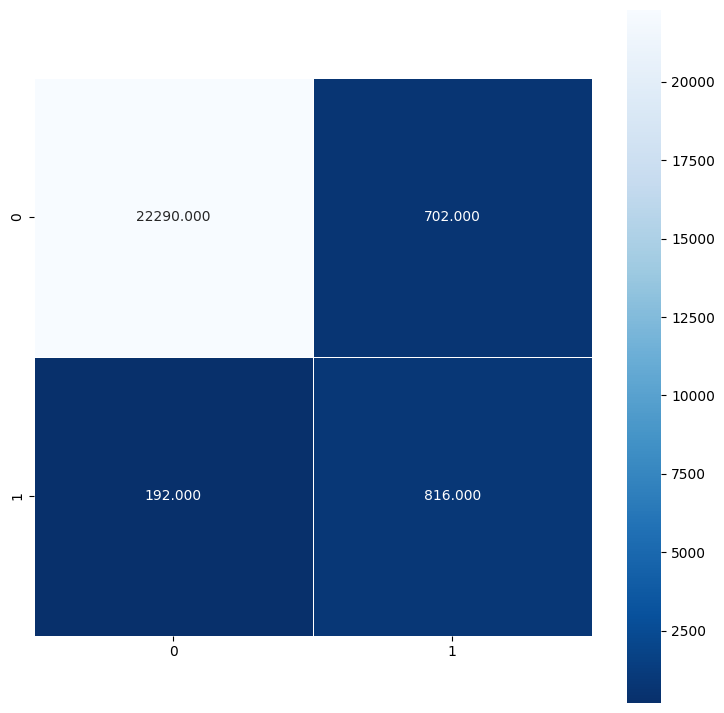

In [23]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.show() 

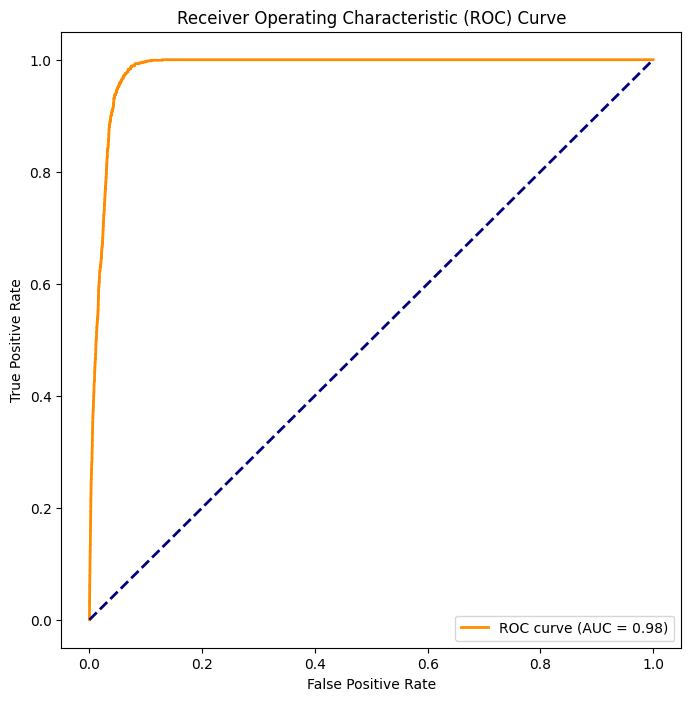

In [24]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()